In [1]:
import argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
import numpy as np 

from preprocess import get_mnist, get_webcam
from train import TrainerVaDE

In [2]:
class Args:
    batch_size = 128
    lr = 5e-5
    dataset = 'webcam'
    pretrain = True
    epochs = 200
    n_shots = 10
    sup_mul = 0.9
    cl_mul = 100


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
if args.dataset == 'mnist':
    dataloader_sup, dataloader_unsup, dataloader_test = get_mnist(args)
    n_classes = 10
else:
    dataloader_sup, dataloader_unsup, dataloader_test = get_webcam(args)
    n_classes = 31

In [3]:
vade = TrainerVaDE(args, device, dataloader_sup, dataloader_unsup, dataloader_test, n_classes)

In [4]:
if args.dataset == 'webcam':
    classes = ['back_pack',
                'bike',
                'bike_helmet',
                'bookcase',
                'bottle',
                'calculator',
                'desk_chair',
                'desk_lamp',
                'desktop_computer',
                'file_cabinet',
                'headphones',
                'keyboard',
                'laptop_computer',
                'letter_tray',
                'mobile_phone',
                'monitor',
                'mouse',
                'mug',
                'paper_notebook',
                'pen',
                'phone',
                'printer',
                'projector',
                'punchers',
                'ring_binder',
                'ruler',
                'scissors',
                'speaker',
                'stapler',
                'tape_dispenser',
                'trash_can']
else:
    classes = ['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9']


def get_latent_space(dataloader, z_dim, model, device, ftr_ext=None):
    z = torch.zeros((1, z_dim)).float().to(device)
    y = torch.zeros((1)).long().to(device)
    with torch.no_grad():
        for img, label in dataloader:
            img, label = img.to(device).float(), label.to(device).long()
            if ftr_ext is not None:
                img = ftr_ext(img); img = img.detach()

            mu, log_var = model.encode(img)
            z_l = model.reparameterize(mu, log_var)
            y = torch.cat((y, label), dim=0)
            z = torch.cat((z, z_l), dim=0)
    return z[1:], y[1:]


def plot_tsne(X_embedded, y, ticks, dataset):
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,10))

    cmap = plt.get_cmap('jet', 31)


    cax = ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.numpy(),
                      s=15, cmap=cmap)

    cbar = f.colorbar(cax, ticks=np.linspace(0,30,31))
    cbar.ax.set_yticklabels(ticks)

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    plt.savefig('weights/vade_tsne_{}_ss.png'.format(dataset))
    plt.show()

In [5]:
vade.train()

Training VaDE...


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Testing VaDE... Epoch: -1, Loss: 307.14392852783203, Acc: 73.1068224009901
Training VaDE... Epoch: 0, Loss: 308.80482482910156, Acc: 70.0
Testing VaDE... Epoch: 0, Loss: 304.78160095214844, Acc: 74.43533415841584
Training VaDE... Epoch: 1, Loss: 305.1681213378906, Acc: 74.51612903225806
Testing VaDE... Epoch: 1, Loss: 303.02854919433594, Acc: 75.76384591584159
Training VaDE... Epoch: 2, Loss: 303.4032897949219, Acc: 73.87096774193549
Testing VaDE... Epoch: 2, Loss: 302.2046661376953, Acc: 75.51632116336634
Training VaDE... Epoch: 3, Loss: 301.84075927734375, Acc: 74.19354838709677
Testing VaDE... Epoch: 3, Loss: 301.8529281616211, Acc: 72.72973391089108
Training VaDE... Epoch: 4, Loss: 302.02667236328125, Acc: 73.22580645161291
Testing VaDE... Epoch: 4, Loss: 300.76941680908203, Acc: 73.42009591584159
Training VaDE... Epoch: 5, Loss: 299.4617004394531, Acc: 76.12903225806451
Testing VaDE... Epoch: 5, Loss: 298.89801025390625, Acc: 73.64054764851485
Training VaDE... Epoch: 6, Loss: 297.

Training VaDE... Epoch: 54, Loss: 276.61485290527344, Acc: 90.0
Testing VaDE... Epoch: 54, Loss: 287.1187515258789, Acc: 80.17868193069307
Training VaDE... Epoch: 55, Loss: 277.216552734375, Acc: 90.64516129032259
Testing VaDE... Epoch: 55, Loss: 287.1263198852539, Acc: 80.47841893564356
Training VaDE... Epoch: 56, Loss: 276.79986572265625, Acc: 90.96774193548387
Testing VaDE... Epoch: 56, Loss: 286.9017791748047, Acc: 81.06435643564356
Training VaDE... Epoch: 57, Loss: 276.2230224609375, Acc: 90.96774193548387
Testing VaDE... Epoch: 57, Loss: 285.47896575927734, Acc: 81.44144492574257
Training VaDE... Epoch: 58, Loss: 275.6225128173828, Acc: 91.29032258064517
Testing VaDE... Epoch: 58, Loss: 286.9249801635742, Acc: 80.42620668316832
Training VaDE... Epoch: 59, Loss: 276.4897766113281, Acc: 91.61290322580645
Testing VaDE... Epoch: 59, Loss: 287.18982696533203, Acc: 78.74574566831683
Training VaDE... Epoch: 60, Loss: 276.6435546875, Acc: 89.35483870967742
Testing VaDE... Epoch: 60, Loss

Testing VaDE... Epoch: 108, Loss: 281.8853759765625, Acc: 84.7366181930693
Training VaDE... Epoch: 109, Loss: 269.8326873779297, Acc: 94.83870967741936
Testing VaDE... Epoch: 109, Loss: 282.72814178466797, Acc: 83.9553681930693
Training VaDE... Epoch: 110, Loss: 269.6612091064453, Acc: 95.80645161290322
Testing VaDE... Epoch: 110, Loss: 283.17456817626953, Acc: 83.01748143564356
Training VaDE... Epoch: 111, Loss: 270.43638610839844, Acc: 94.51612903225806
Testing VaDE... Epoch: 111, Loss: 282.1286849975586, Acc: 84.3459931930693
Training VaDE... Epoch: 112, Loss: 270.0693359375, Acc: 95.80645161290322
Testing VaDE... Epoch: 112, Loss: 282.88153076171875, Acc: 82.73128094059406
Training VaDE... Epoch: 113, Loss: 269.9732360839844, Acc: 95.16129032258065
Testing VaDE... Epoch: 113, Loss: 282.5915832519531, Acc: 82.8743811881188
Training VaDE... Epoch: 114, Loss: 269.4617614746094, Acc: 94.51612903225806
Testing VaDE... Epoch: 114, Loss: 281.46356201171875, Acc: 85.0363551980198
Training 

Testing VaDE... Epoch: 162, Loss: 281.26256561279297, Acc: 85.0363551980198
Training VaDE... Epoch: 163, Loss: 267.1663818359375, Acc: 97.09677419354838
Testing VaDE... Epoch: 163, Loss: 281.1101608276367, Acc: 84.89325495049505
Training VaDE... Epoch: 164, Loss: 267.7413330078125, Acc: 96.45161290322581
Testing VaDE... Epoch: 164, Loss: 282.0886535644531, Acc: 83.4738551980198
Training VaDE... Epoch: 165, Loss: 266.6870422363281, Acc: 96.45161290322581
Testing VaDE... Epoch: 165, Loss: 281.51961517333984, Acc: 84.20289294554456
Training VaDE... Epoch: 166, Loss: 266.65623474121094, Acc: 96.12903225806451
Testing VaDE... Epoch: 166, Loss: 280.81298828125, Acc: 84.59351794554456
Training VaDE... Epoch: 167, Loss: 267.1117706298828, Acc: 97.74193548387096
Testing VaDE... Epoch: 167, Loss: 281.5899887084961, Acc: 83.4603186881188
Training VaDE... Epoch: 168, Loss: 267.19569396972656, Acc: 96.45161290322581
Testing VaDE... Epoch: 168, Loss: 280.6363525390625, Acc: 85.08856745049505
Trainin

In [6]:
z_dim = 10
model = vade.VaDE
z, y = get_latent_space(dataloader_test, z_dim, model, device, vade.feature_extractor)
z, y = z.cpu(), y.cpu()
z_embedded = TSNE(n_components=2).fit_transform(z.detach().numpy())


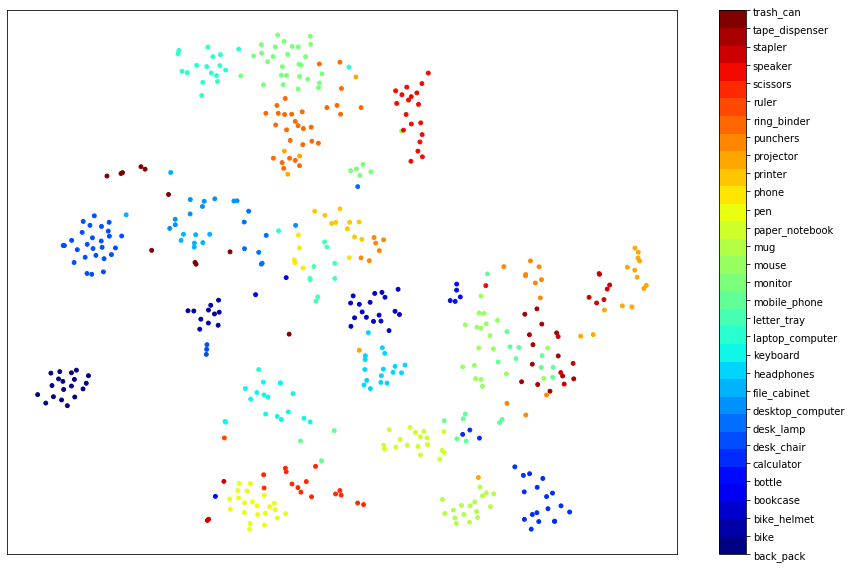

In [7]:
plot_tsne(z_embedded, y, classes, args.dataset)

In [8]:
acc = np.array(vade.acc)
acc_t = np.array(vade.acc_t)
rec = np.array(vade.rec)
rec_t = np.array(vade.rec_t)
dkl = np.array(vade.dkl)
dkl_t = np.array(vade.dkl_t)

def plot_loss(values, values_t, metric, dataset):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('VaDE {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig('weights/vade_{}_{}_ss'.format(metric, dataset))

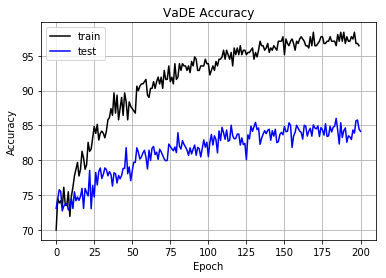

In [9]:
plot_loss(acc, acc_t, 'Accuracy', args.dataset)

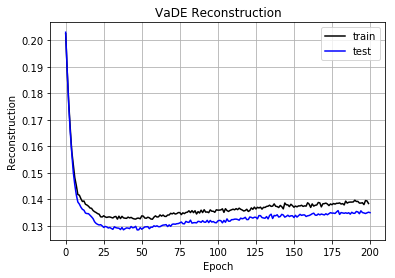

In [10]:
plot_loss(rec, rec_t, 'Reconstruction', args.dataset)

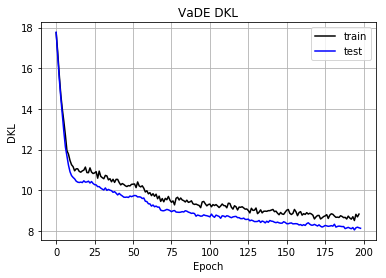

In [11]:
plot_loss(dkl[2:], dkl_t[2:], 'DKL', args.dataset)